In [4]:
# Importing Libraries:
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\asusZ\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [5]:
# ingesting data
df = pd.read_csv("Telco Data.csv")

In [6]:
df.head()

,region,tenure,age,marital,address,income,education,employ,retire,gender,...,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,unsubscribe
0,2,13,44,1,9,64,4,5,0,0,...,0,0,1.308,NaN,NaN,2.015,NaN,4.159,1,1
1,3,11,33,1,7,136,5,5,0,0,...,1,0,1.482,3.033,NaN,2.725,3.575,4.913,4,1
2,3,68,52,1,24,116,1,29,0,1,...,1,0,2.899,2.890,NaN,3.409,NaN,4.754,3,0
3,2,33,33,0,12,33,2,0,0,1,...,0,0,2.246,NaN,NaN,NaN,NaN,3.497,1,1
4,2,23,30,1,9,30,1,2,0,0,...,1,0,1.841,NaN,NaN,NaN,NaN,3.401,3,0


In [ ]:
df.describe() # some informative information on the dataset

In [7]:
df.isna().sum() #finding attributes with missing cells

region           0
tenure           0
age              0
marital          0
address          0
income           0
education        0
employ           0
retire           0
gender           0
reside           0
tollfree         0
equip            0
callcard         0
wireless         0
longmon          0
tollmon          0
equipmon         0
cardmon          0
wiremon          0
longten          0
tollten          0
equipten         0
cardten          0
wireten          0
multline         0
voice            0
pager            0
internet         0
callid           0
callwait         0
forward          0
confer           0
ebill            0
loglong          0
logtoll        525
logequi        614
logcard        322
logwire        704
lninc            0
custcat          0
unsubscribe      0
dtype: int64

In [8]:
df.info() #further information on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       1000 non-null   int64  
 1   tenure       1000 non-null   int64  
 2   age          1000 non-null   int64  
 3   marital      1000 non-null   int64  
 4   address      1000 non-null   int64  
 5   income       1000 non-null   int64  
 6   education    1000 non-null   int64  
 7   employ       1000 non-null   int64  
 8   retire       1000 non-null   int64  
 9   gender       1000 non-null   int64  
 10  reside       1000 non-null   int64  
 11  tollfree     1000 non-null   int64  
 12  equip        1000 non-null   int64  
 13  callcard     1000 non-null   int64  
 14  wireless     1000 non-null   int64  
 15  longmon      1000 non-null   float64
 16  tollmon      1000 non-null   float64
 17  equipmon     1000 non-null   float64
 18  cardmon      1000 non-null   float64
 19  wiremon

In [9]:
# dropping columns with missing cells
df = df.drop(['logtoll', 'logequi', 'logcard', 'logwire'], axis = 1)

In [10]:
y = df['unsubscribe']
df2 = df.drop(['unsubscribe'], axis = 1)

In [11]:
df.nunique()

region           3
tenure          72
age             60
marital          2
address         50
income         218
education        5
employ          46
retire           2
gender           2
reside           8
tollfree         2
equip            2
callcard         2
wireless         2
longmon        425
tollmon        162
equipmon       310
cardmon        176
wiremon        263
longten        960
tollten        473
equipten       386
cardten        338
wireten        297
multline         2
voice            2
pager            2
internet         2
callid           2
callwait         2
forward          2
confer           2
ebill            2
loglong        425
lninc          218
custcat          4
unsubscribe      2
dtype: int64

<AxesSubplot:title={'center':'Correlation with Churn'}>

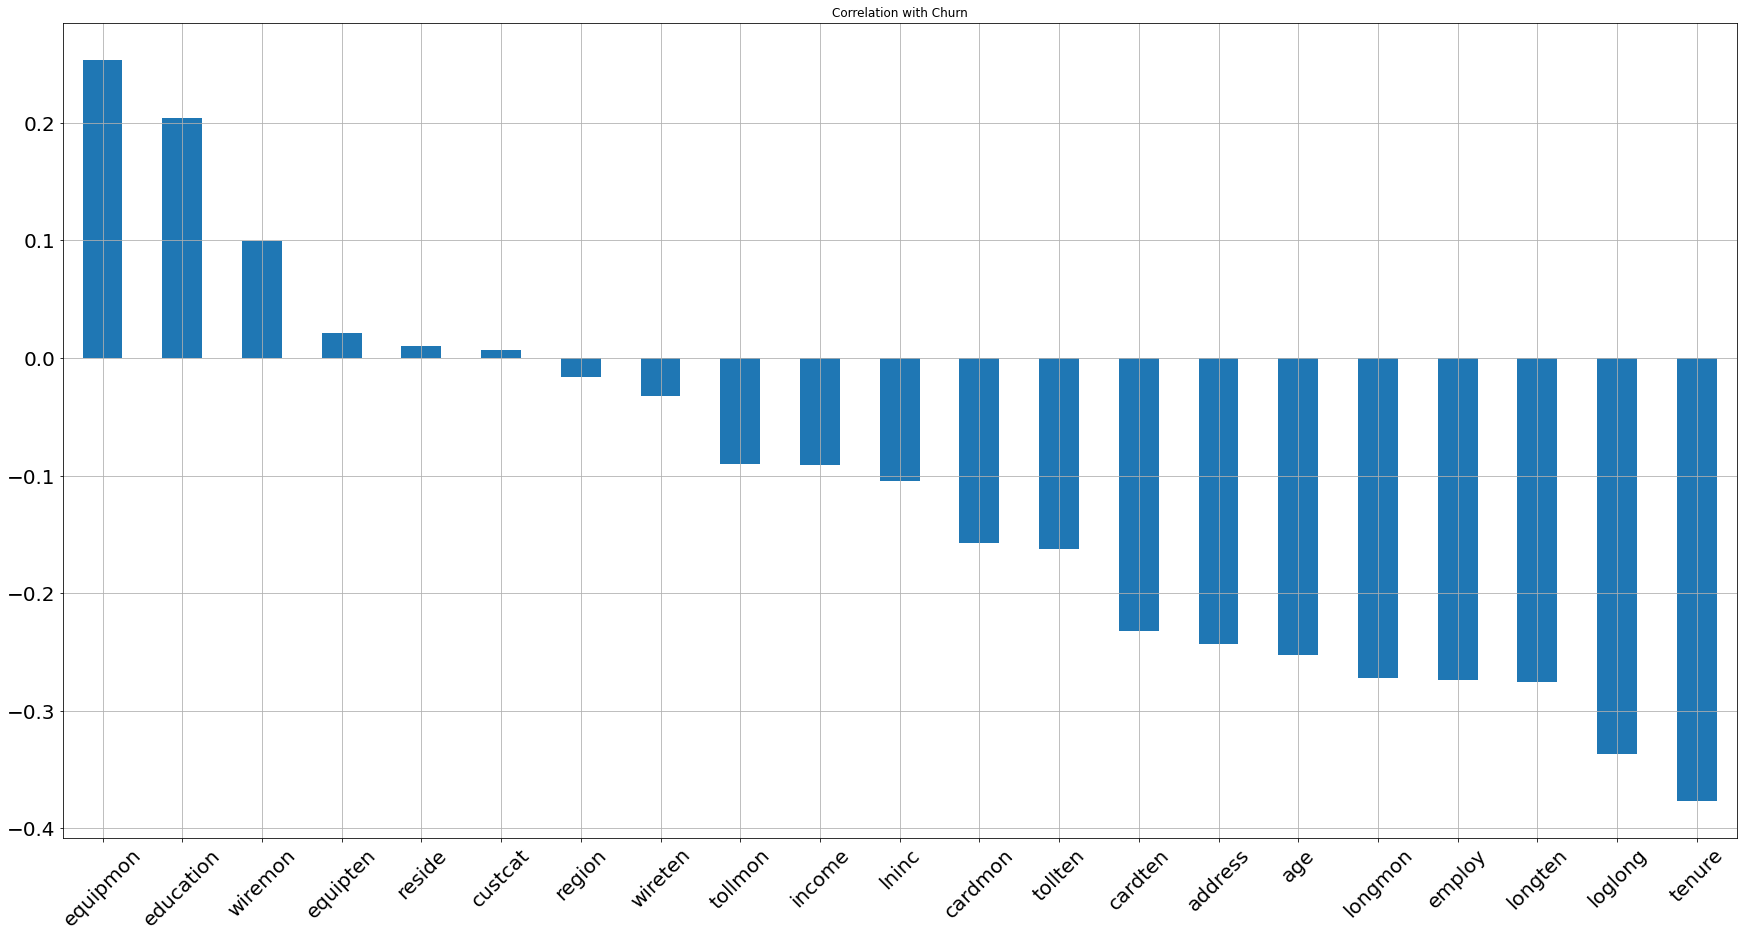

In [12]:
# Drop columns with less unique values:
df3 = df2.drop(['ebill','confer', 'forward', 'callwait', 'callid', 'internet', 'pager', 'voice', 'multline', 'wireless', 'callcard', 'equip', 'tollfree', 'gender', 'retire', 'marital'], axis=1)
df3.corrwith(df['unsubscribe']).sort_values(ascending = False).plot.bar(
figsize= (30, 15), title = 'Correlation with Churn', fontsize= 20, rot = 45, grid = True)

[15:17:47] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


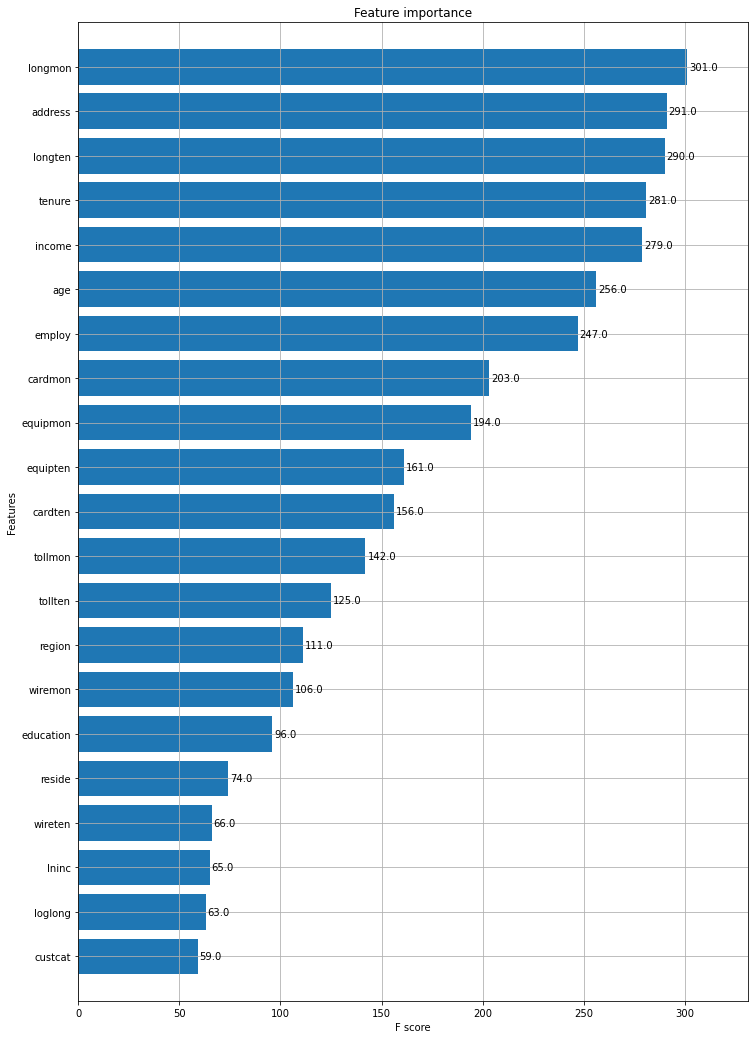

In [13]:
#Feature Importance:
clf = xgb.XGBClassifier(max_depth=7, n_estimators=100,colsample_bytree=0.8, subsample=0.8, nthread=10, learning_rate=0.05)
clf.fit(df3, y)
# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(clf, max_num_features=50, height=0.8, ax=ax)
plt.show()

the longer a customer's tenure, the more loyal he/she is. 1 year customers(new) more likely to unsubscribe than not unsubscribe.
Strategy needed for new customer retainment

In [ ]:
pd.crosstab(pd.qcut(df['tenure'], q=6, labels = ['1yr','2yr','3yr','4yr','5yr','6yr']), df.unsubscribe.plot(kind='bar',rot=45))
plt.title('Tenure vs unsubscribe')
plt.xlabel('tenure')
plt.ylabel('frequenct=y of unsubscribe')
plt.savefig('Tenure vs unsubscribe')

In [ ]:
pd.crosstab(df.callcard, df.unsubscribe).plot(kind='bar')
plt.title('Tenure vs unsubscribe')
plt.xlabel('tenure')
plt.ylabel('frequenct=y of unsubscribe')
plt.savefig('Tenure vs unsubscribe')

In [ ]:
labels='unsubscribe', 'retained'
sizes = [df.unsubscribe[df[unsubscribe]==1].count(), df.unsubscribe[df[unsubscribe]==0].count()]
explode = (0.1,0)
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('proportion of customer unsubscribed and retained', size=20)
plt.show()

# for duration of this dataset, the unsubscribe rate is 27.4%

In [ ]:
corrmat = df.corr(method='pearson')
f, ax=plt.subplots(figsize=(12,12))

# draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1, square=True)
plt.title('important variable correlation map', size=20)
plt.show()
